<h1>TP Filtrado Digital </h1>

<h2> Diseño de filtro</h2>

En este apartado se incluira el codigo utilizado para el diseño de los filtros (FIR least squares e IIR)

<h3>Diseño filtro IIR ButterWorth</h3>

In [37]:
import scipy.signal as sig
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io as sio
import pytc2.sistemas_lineales as tc2
from scipy.signal import firls, freqz

In [27]:
fs = 44100 # Hz
nyq_frec = fs / 2
ripple = 1 # dB
atenuacion = 20 # dB

ws1 = 3000 #Hz
wp1 = 2000 #Hz

In [28]:
lp_sos_butter = sig.iirdesign(wp = wp1/nyq_frec, ws = ws1/nyq_frec, gpass = ripple, gstop = atenuacion, analog=False, ftype='butter', output='sos')      

frecuencias = np.linspace(0, 22050, num = 10000)

#plt.figure(figsize=(10, 4))  


ganancia_bp = 0 # En db
mult =( 10**(ganancia_bp/4 / 20) ) 

lp_sos_butter[0, 0 : 3 ] = lp_sos_butter[0, 0 : 3] *  1e5 * mult   

lp_sos_butter[1, 0 : 3 ] = lp_sos_butter[1, 0 : 3] *  2e-2 * mult  

lp_sos_butter[2, 0 : 3 ] = lp_sos_butter[2, 0 : 3] * 0.25e-1 * mult

lp_sos_butter[3, 0 : 3 ] = lp_sos_butter[3, 0 : 3] * 2e-2   *mult 

_, h1 = sig.sosfreqz(lp_sos_butter[0, :], frecuencias, fs = fs)
_, h2 = sig.sosfreqz(lp_sos_butter[1, :], frecuencias, fs = fs)
_, h3 = sig.sosfreqz(lp_sos_butter[2, :], frecuencias, fs = fs)
_, h4 = sig.sosfreqz(lp_sos_butter[3, :], frecuencias, fs = fs)
w, h = sig.sosfreqz(lp_sos_butter, frecuencias, fs = fs)

C:\Users\guido\AppData\Local\Temp\ipykernel_6168\361476776.py:2: RuntimeWarning: divide by zero encountered in log10
  moduloIIR = 20*np.log10(abs(h))


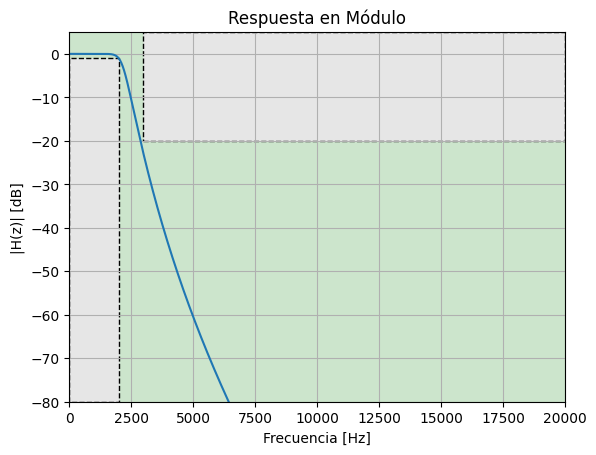

In [31]:
#Calculo rta mod y fase
moduloIIR = 20*np.log10(abs(h))
faseIIR = np.angle(h)*180/np.pi

ejeMuestrasIIR = w*(2*np.pi/fs)
retardoGrupoIIR = -np.diff(faseIIR) / np.diff(ejeMuestrasIIR)

#Respuesta en modulo
plt.figure(1)
plt.plot(w, moduloIIR)
plt.title('Respuesta en Módulo')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('|H(z)| [dB]')
plt.grid()
plt.axis([0, 20e3, -80 ,5])
tc2.plot_plantilla(filter_type = 'lowpass', fpass = wp1, ripple = ripple, fstop = ws1, attenuation = atenuacion, fs = fs)
plt.show()


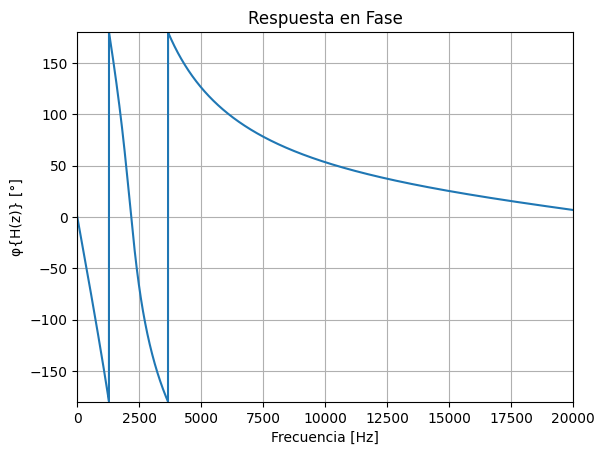

In [32]:
#Respuesta en fase
plt.figure(2)
plt.plot(w, faseIIR)
plt.title('Respuesta en Fase')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('φ{H(z)} [°]')
plt.grid()
plt.axis([0, 20e3, -180 ,180])
plt.show()



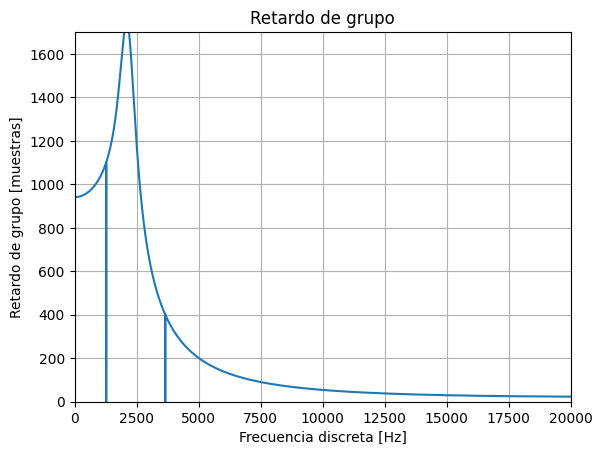

In [33]:

#Ret grupo
plt.figure(3)
plt.plot(w[:-1], retardoGrupoIIR)
plt.title('Retardo de grupo')
plt.xlabel('Frecuencia discreta [Hz]')
plt.ylabel('Retardo de grupo [muestras]')
plt.axis([0, 20e3, 0 ,1700])
plt.grid()
plt.show()

In [34]:

print("                  Numerador           |                Denominador         ")
print(lp_sos_butter)

                  Numerador           |                Denominador         
[[ 0.01586624  0.03173247  0.01586624  1.         -1.46652493  0.53976899]
 [ 0.02        0.04        0.02        1.         -1.51976692  0.5956701 ]
 [ 0.025       0.05        0.025       1.         -1.62904776  0.71040886]
 [ 0.02        0.04        0.02        1.         -1.79796699  0.88776458]]


<h3>Diseño filtro FIR LeastSquares</h3>

In [35]:
fs = 44100 # Hz
nyq_frec = fs / 2
FPB1 = 2e3
FPB2 = 8e3
FSB1 = 4e3
FSB2 = 6e3

In [38]:
# Diseña el filtro FIR utilizando el método de mínimos cuadrados

orden_del_filtro = 101

desp_fc = 0 # para reducir el orden del filtro desplazo las bandas de paso para que no atenuen en los extremos

bandas = [0,FPB1 ,FSB1 ,FSB2 ,FPB2,nyq_frec]
atenuaciones = [0.9,0.9,0.1,0.1,0.9,0.9]

num = firls(numtaps=orden_del_filtro, bands= bandas, desired=atenuaciones, fs=fs)

w, h = freqz( num )

# renormalizo el eje de frecuencia

w = w / np.pi * nyq_frec


<Figure size 800x400 with 0 Axes>

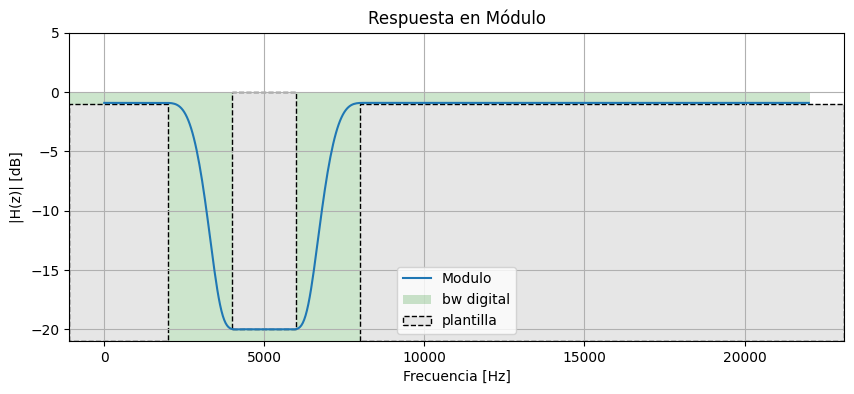

In [42]:
#####################
#Calculo respuesta en modulo fase y retardo grupo
#####################
#Plot modulo
plt.figure(figsize=(8, 4))

moduloFIR = 20*np.log10(abs(h))

plt.figure(figsize=[10,4])
plt.plot(w,moduloFIR, label= "Modulo")
plt.title('Respuesta en Módulo')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('|H(z)| [dB]')
plt.grid()
tc2.plot_plantilla(filter_type = 'bandstop', fpass = [FPB1,FPB2], ripple = 1, fstop = [FSB1,FSB2], attenuation = 20, fs = fs)
plt.legend()
plt.show()


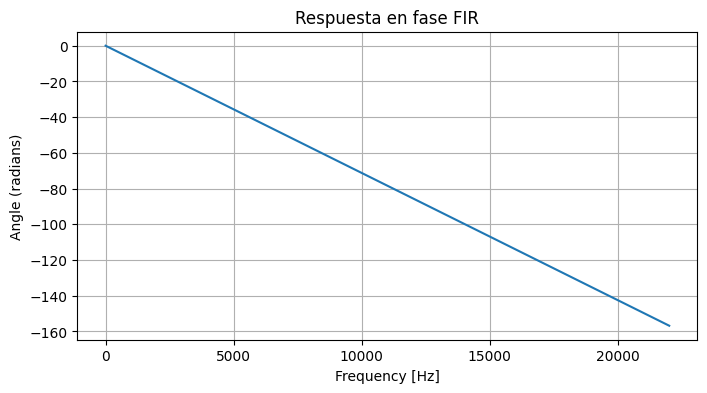

In [43]:
plt.figure(figsize=(8, 4))

plt.title('Respuesta en fase FIR')
angles = np.unwrap(np.angle(h))
plt.plot(w, angles)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Angle (radians)')
plt.grid(True)

plt.show()

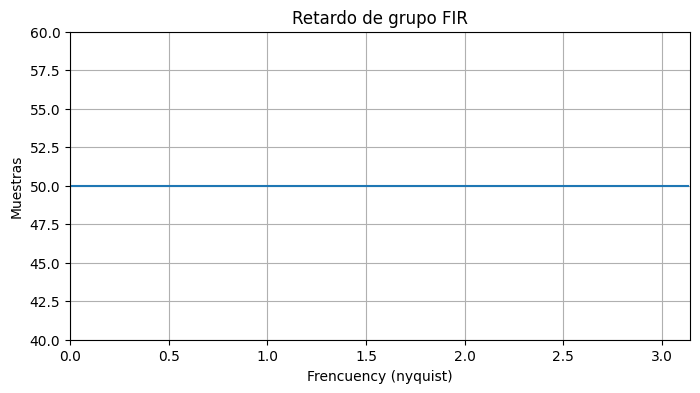

In [44]:

plt.figure(figsize=(8, 4))  # Ancho: 8 pulgadas, Alto: 4 pulgadas

ejeMuestrasFIR = w*(2*np.pi/fs)

plt.title('Retardo de grupo FIR')
group_delay = -np.diff(angles) / np.diff(ejeMuestrasFIR)
plt.plot(ejeMuestrasFIR[:-1], group_delay)

plt.xlabel('Frencuency (nyquist)')
plt.ylabel('Muestras')
plt.grid(True)
plt.axis([0, np.pi, 40,60 ]);
plt.show()

In [46]:
#Coeficientes
print(num)

[ 6.30769855e-05  1.50047917e-04  1.88773812e-04  1.10348152e-04
 -5.59329561e-05 -1.75008387e-04 -1.34264985e-04 -2.80753682e-06
 -2.59257104e-05 -3.82371073e-04 -9.02839546e-04 -1.08412382e-03
 -5.11390241e-04  6.44751410e-04  1.60370878e-03  1.61510727e-03
  7.55461127e-04  2.98963283e-05  4.51948123e-04  1.83392657e-03
  2.57115886e-03  9.74559026e-04 -2.85277724e-03 -6.48774563e-03
 -6.95860057e-03 -3.54191762e-03  1.10636457e-03  3.05992405e-03
  9.80035074e-04 -1.96775222e-03 -6.24428994e-04  6.84569592e-03
  1.57914909e-02  1.79256292e-02  8.69113986e-03 -7.34545256e-03
 -1.89790439e-02 -1.79094764e-02 -7.22094749e-03 -2.99458856e-05
 -7.52594133e-03 -2.60492620e-02 -3.59554019e-02 -1.63937320e-02
  3.41728795e-02  8.94476687e-02  1.09239482e-01  6.84661235e-02
 -2.02770881e-02 -1.09726255e-01  7.52853584e-01 -1.09726255e-01
 -2.02770881e-02  6.84661235e-02  1.09239482e-01  8.94476687e-02
  3.41728795e-02 -1.63937320e-02 -3.59554019e-02 -2.60492620e-02
 -7.52594133e-03 -2.99458

<h2> Simulaciones</h2>

En este apartado se mostraran las simulaciones realizadas para obtener los resultados de las mediciones del Trabajo practico de filtrado digital para la materia "Teoria de circuitos 2"



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d


<h2>Filtro TalkThrough</h2>

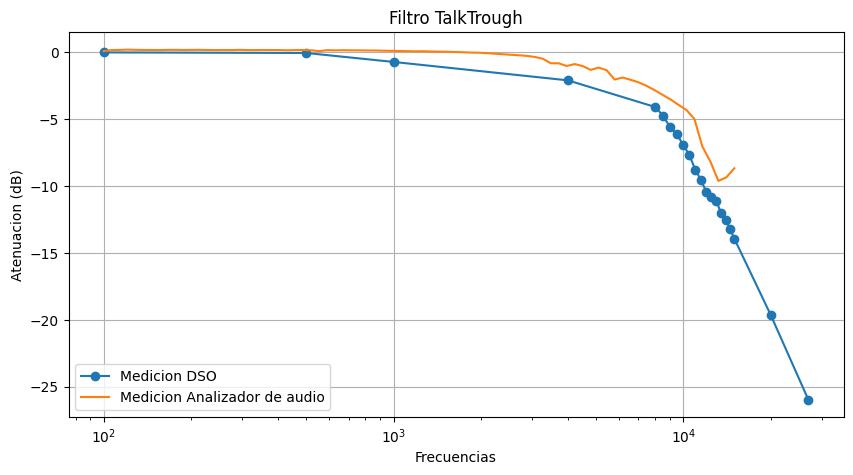

In [19]:
## Mediciones con osciloscopio

## todas las mediciones son en VPP
Vin  = np.array([2.14, 2.01, 2.03, 2.01, 2, 1.98, 1.96, 1.94, 1.91, 1.89, 1.87, 1.87, 1.86, 1.84, 1.84, 1.82, 1.79, 1.79, 1.75, 1.72, 1.67])
Vout = np.array([2.14, 2, 1.87, 1.58, 1.25, 1.15, 1.03, 0.960, 0.860, 0.780, 0.680, 0.624, 0.560, 0.528, 0.512, 0.456, 0.424, 0.392, 0.352, 0.18, 0.084])
Freq = np.array([100, 500, 1000, 4000, 8000, 8500, 9000, 9500, 10000, 10500, 11000, 11500, 12000, 12500, 13000, 13500, 14000, 14500, 15000, 20000, 27000])


atenuacion = 20* np.log10(Vout/Vin)

plt.figure(figsize=(10, 5))  

plt.semilogx(Freq, atenuacion, marker='o', linestyle='-',label = "Medicion DSO")

## Mediciones con Analizador de audio

# Levanto .CSV en DataFrames
data_vo_vi = pd.read_csv('datos1.csv', delimiter=',')

# Leo para rta en modulo
frequencies_vo_vi = data_vo_vi['Freq']
vo = data_vo_vi['Vac']

plt.semilogx(frequencies_vo_vi, vo,label = "Medicion Analizador de audio")


# Configuracion Grafico

plt.title('Filtro TalkTrough')
plt.xlabel('Frecuencias')
plt.ylabel('Atenuacion (dB)')
plt.grid(True)
plt.legend();

# Mostrar la gráfica
plt.show()

Se realiza una interpolacion de ambas respuestas para poder evaluar dicho filtro en los puntos de los subsiguientes filtros


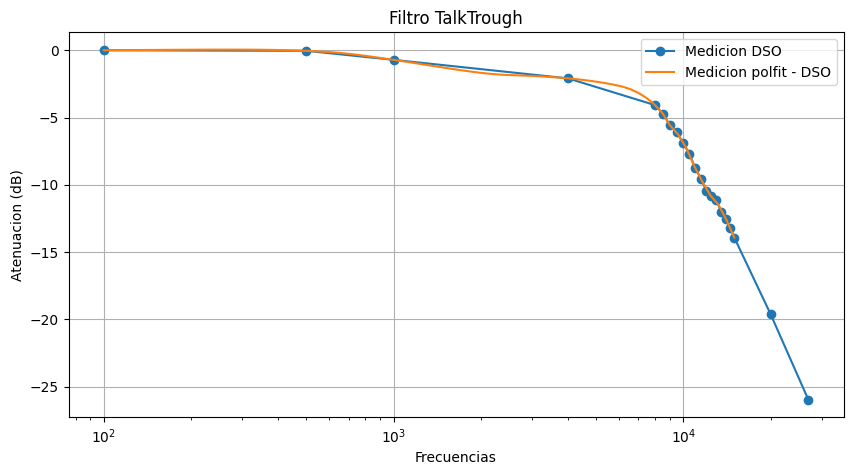

In [20]:

plt.figure(figsize=(10, 5))  
plt.semilogx(Freq, atenuacion, marker='o', linestyle='-',label = "Medicion DSO")

# Creo interpolacion para poder restar a los filtros la respuesta del TalkTrought
#interpolacion con DSO
interp_DSO_TalkTrought = interp1d(Freq, atenuacion, kind='quadratic')
vo_pol = interp_DSO_TalkTrought(frequencies_vo_vi)

plt.semilogx(frequencies_vo_vi, vo_pol, label="Medicion polfit - DSO")

#interpolacion con Analizador de audio
interp_AUDIO_TalkTrought = interp1d(frequencies_vo_vi, vo, kind='quadratic')
vo_pol = interp_AUDIO_TalkTrought(frequencies_vo_vi)

# Configuracion Grafico

plt.title('Filtro TalkTrough')
plt.xlabel('Frecuencias')
plt.ylabel('Atenuacion (dB)')
plt.grid(True)
plt.legend();

# Mostrar la gráfica
plt.show()

<h2>Filtro FIR Equirripple</h2>
A continuacion se muestran las respuestas sin eliminar el TalkThrough

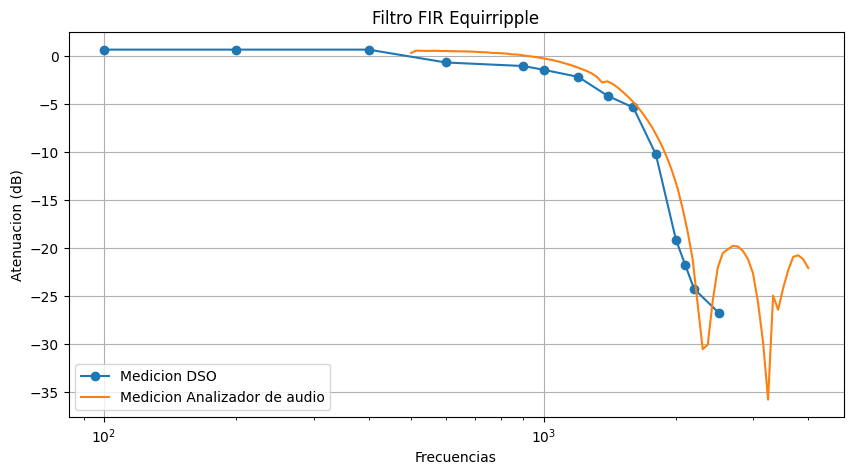

In [21]:
## todas las mediciones son en VPP (V)

Vin =  np.array([1.040 , 1.040  , 1.040  , 1.040 , 1.040, 1.040 , 1.030 , 1.035 , 1.040 , 1.040 , 1.040  , 0.980 , 0.980 , 0.975])
Vout = np.array([1.120 , 1.120  , 1.120  , 0.960 , 0.920, 0.880 , 0.800 , 0.640 , 0.560 , 0.320 , 0.115  , 0.080 , 0.060 , 0.045])
Freq = np.array([100   , 200    , 400    , 600   , 900  , 1000  , 1200  , 1400  , 1600  , 1800  , 2000   , 2100  , 2200  , 2500 ]) 

atenuacion = 20* np.log10(Vout/Vin)

plt.figure(figsize=(10, 5))  

plt.semilogx(Freq, atenuacion, marker='o', linestyle='-',label = "Medicion DSO")

# Levanto .CSV en DataFrames
data_vo_vi = pd.read_csv('datos2.csv', delimiter=',')

# Leo para rta en modulo
frequencies_vo_vi = data_vo_vi['Freq']
vo = data_vo_vi['Vac']

plt.semilogx(frequencies_vo_vi, vo,label = "Medicion Analizador de audio")


# Configuracion del grafico
    
plt.title('Filtro FIR Equirripple')
plt.xlabel('Frecuencias')
plt.ylabel('Atenuacion (dB)')
plt.grid(True)
plt.legend();

# Mostrar la gráfica
plt.show()

Se muestra a continuacion la comparacion entre el filtro con y sin la transferencia TalkThrough para ambos casos


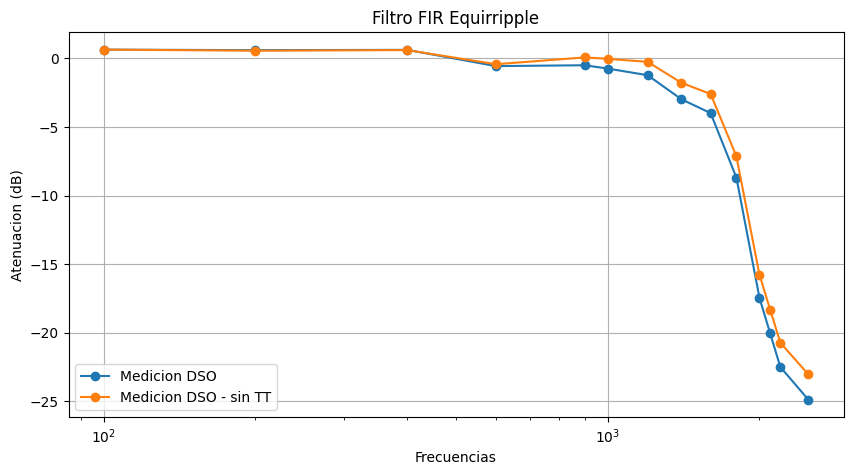

In [6]:
plt.figure(figsize=(10, 5)) 
plt.semilogx(Freq, atenuacion, marker='o', linestyle='-',label = "Medicion DSO")

## Restando Filtro TalkTrought a ambas respuestas

vo_pol = interp_DSO_TalkTrought(Freq)
atenuacion = atenuacion - vo_pol
plt.semilogx(Freq, atenuacion,marker='o', linestyle='-',label = "Medicion DSO - sin TT")
# Configuracion del grafico
    
plt.title('Filtro FIR Equirripple')
plt.xlabel('Frecuencias')
plt.ylabel('Atenuacion (dB)')
plt.grid(True)
plt.legend();

# Mostrar la gráfica
plt.show()


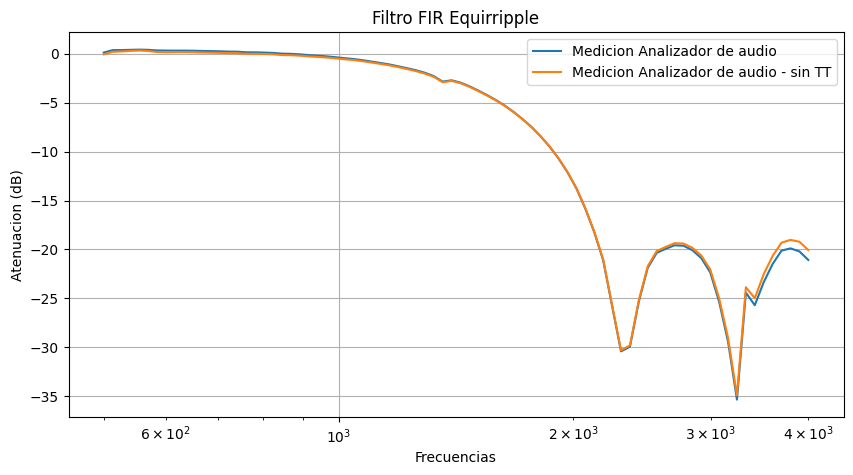

In [7]:
plt.figure(figsize=(10, 5)) 
plt.semilogx(frequencies_vo_vi, vo,label = "Medicion Analizador de audio")

vo_pol = interp_AUDIO_TalkTrought(frequencies_vo_vi)
vo = vo - vo_pol
plt.semilogx(frequencies_vo_vi, vo,label = "Medicion Analizador de audio - sin TT")   
# Configuracion del grafico
    
plt.title('Filtro FIR Equirripple')
plt.xlabel('Frecuencias')
plt.ylabel('Atenuacion (dB)')
plt.grid(True)
plt.legend();

# Mostrar la gráfica
plt.show()

<h2>Filtro FIR Least Squares</h2>
A continuacion se muestran las respuestas sin eliminar el TalkThrough

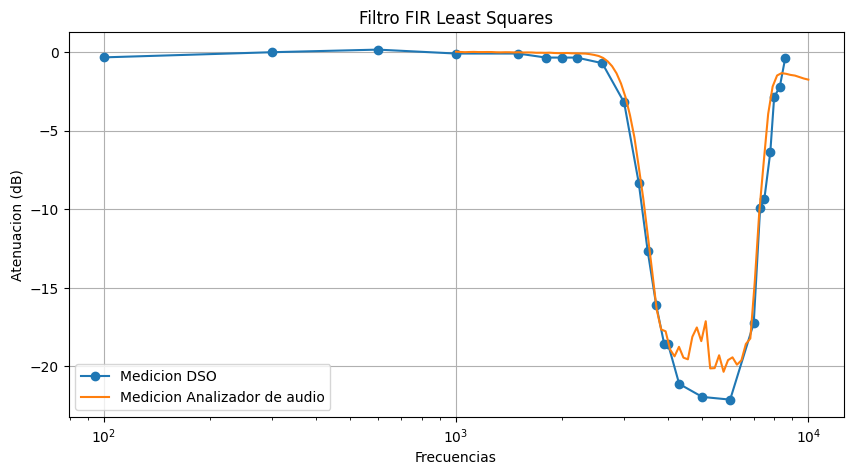

In [13]:
## todas las mediciones son en VPP (V)

Vin =  np.array([1.080 , 1.040  , 1.040  , 1.040  , 1.040 , 1.040 ,  1.040 , 1.040 , 1.040  , 1.040 , 1.040 , 1.030 , 1.020 , 1.020 , 1.020 , 1     , 1     , 1.020 , 1.020 , 1     , 1      , 1     , 1     , 1    ,  0.960])
Vout = np.array([1.040 , 1.040  , 1.060  , 1.030  , 1.030 , 1     ,  1     , 1     , 0.960  , 0.720 , 0.400 , 0.240 , 0.160 , 0.120 , 0.120 , 0.088 , 0.080 , 0.080 , 0.140 , 0.320 , 0.340  , 0.480 , 0.720 , 0.776, 0.920 ])
Freq = np.array([100   , 300    , 600    , 1000   , 1500  , 1800  , 2000   , 2200  , 2600   , 3000  , 3300  , 3500  , 3700  , 3900  , 4000  , 4300  , 5000  , 6000  , 7000  , 7300  , 7500   , 7800  , 8000  , 8300, 8600 ]) 


atenuacion = 20* np.log10(Vout/Vin)

plt.figure(figsize=(10, 5))  

plt.semilogx(Freq, atenuacion, marker='o', linestyle='-',label = "Medicion DSO")

# Levanto .CSV en DataFrames
data_vo_vi = pd.read_csv('datos3.csv', delimiter=',')

# Leo para rta en modulo
frequencies_vo_vi = data_vo_vi['Freq']
vo = data_vo_vi['Vac']

plt.semilogx(frequencies_vo_vi, vo,label = "Medicion Analizador de audio")



# Configuracion del grafico

plt.title('Filtro FIR Least Squares')
plt.xlabel('Frecuencias')
plt.ylabel('Atenuacion (dB)')
plt.grid(True)
plt.legend();

# Mostrar la gráfica
plt.show()

Se muestra a continuacion la comparacion entre el filtro con y sin la transferencia TalkThrough para ambos casos

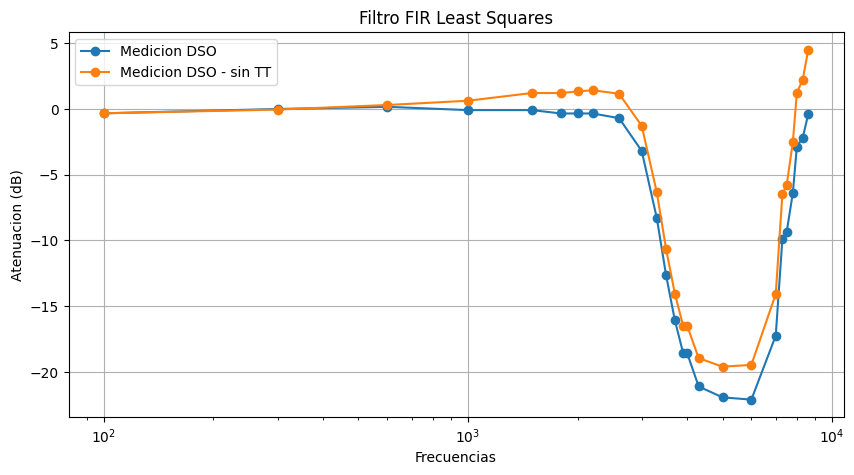

In [11]:
plt.figure(figsize=(10, 5))  
plt.semilogx(Freq, atenuacion, marker='o', linestyle='-',label = "Medicion DSO")

## Restando Filtro TalkTrought a ambas respuestas

vo_pol = interp_DSO_TalkTrought(Freq)
atenuacion = atenuacion - vo_pol
plt.semilogx(Freq, atenuacion,marker='o', linestyle='-',label = "Medicion DSO - sin TT")

# Configuracion del grafico

plt.title('Filtro FIR Least Squares')
plt.xlabel('Frecuencias')
plt.ylabel('Atenuacion (dB)')
plt.grid(True)
plt.legend();

# Mostrar la gráfica
plt.show()

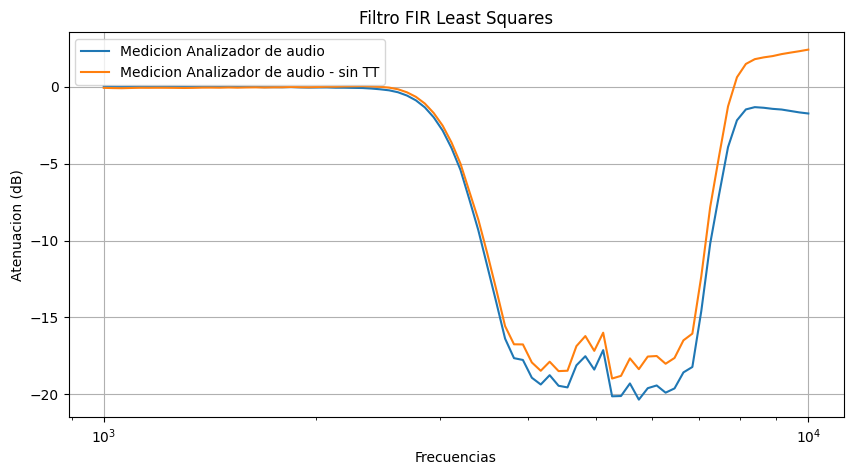

In [12]:
plt.figure(figsize=(10, 5))  
plt.semilogx(frequencies_vo_vi, vo,label = "Medicion Analizador de audio")

# Configuracion del grafico
vo_pol = interp_AUDIO_TalkTrought(frequencies_vo_vi)
vo = vo - vo_pol
plt.semilogx(frequencies_vo_vi, vo,label = "Medicion Analizador de audio - sin TT")   


plt.title('Filtro FIR Least Squares')
plt.xlabel('Frecuencias')
plt.ylabel('Atenuacion (dB)')
plt.grid(True)
plt.legend();

# Mostrar la gráfica
plt.show()

<h2>Filtro IIR ButterWorth</h2>
A continuacion se muestran las respuestas sin eliminar el TalkThrough

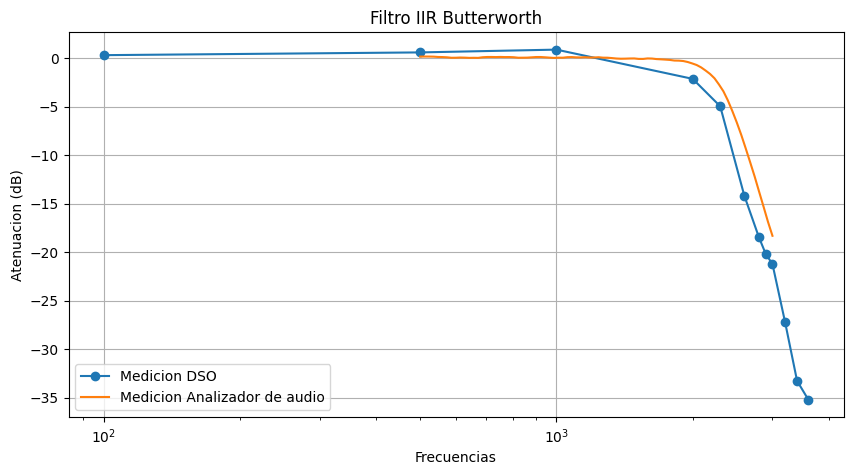

In [15]:
## todas las mediciones son en VPP (V)

Vin =  np.array([1.080 ,0.952 , 0.912 , 0.920 , 0.920 , 0.920, 0.920, 0.920, 0.920, 0.920 , 0.920, 0.920])
Vout = np.array([1.120 ,1.02  , 1.01  , 0.720 , 0.520 , 0.180, 0.110, 0.090, 0.08 , 0.04  , 0.02 , 0.016])
Freq = np.array([100   , 500  , 1000  ,  2000 , 2300  ,2600  ,2800  , 2900 , 3000 , 3200  , 3400 , 3600 ]) 

atenuacion = 20* np.log10(Vout/Vin)

plt.figure(figsize=(10, 5))  

plt.semilogx(Freq, atenuacion, marker='o', linestyle='-',label = "Medicion DSO")

# Levanto .CSV en DataFrames
data_vo_vi = pd.read_csv('datos4.csv', delimiter=',')

# Leo para rta en modulo
frequencies_vo_vi = data_vo_vi['Freq']
vo = data_vo_vi['Vac']

plt.semilogx(frequencies_vo_vi, vo,label = "Medicion Analizador de audio")

# Configuracion del grafico
plt.title('Filtro IIR Butterworth')
plt.xlabel('Frecuencias')
plt.ylabel('Atenuacion (dB)')
plt.grid(True)
plt.legend();

# Mostrar la gráfica
plt.show()


Se muestra a continuacion la comparacion entre el filtro con y sin la transferencia TalkThrough para ambos casos

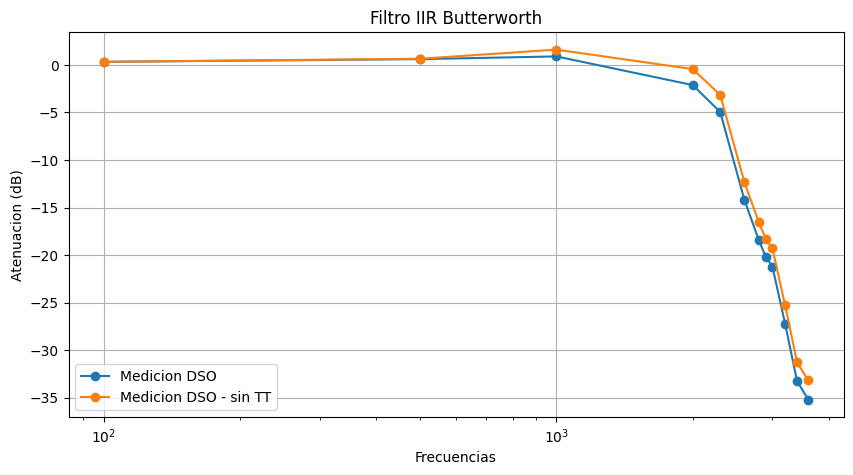

In [16]:
plt.figure(figsize=(10, 5))  

plt.semilogx(Freq, atenuacion, marker='o', linestyle='-',label = "Medicion DSO")

## Restando Filtro TalkTrought a ambas respuestas

vo_pol = interp_DSO_TalkTrought(Freq)
atenuacion = atenuacion - vo_pol
plt.semilogx(Freq, atenuacion,marker='o', linestyle='-',label = "Medicion DSO - sin TT")

# Configuracion del grafico
plt.title('Filtro IIR Butterworth')
plt.xlabel('Frecuencias')
plt.ylabel('Atenuacion (dB)')
plt.grid(True)
plt.legend();

# Mostrar la gráfica
plt.show()

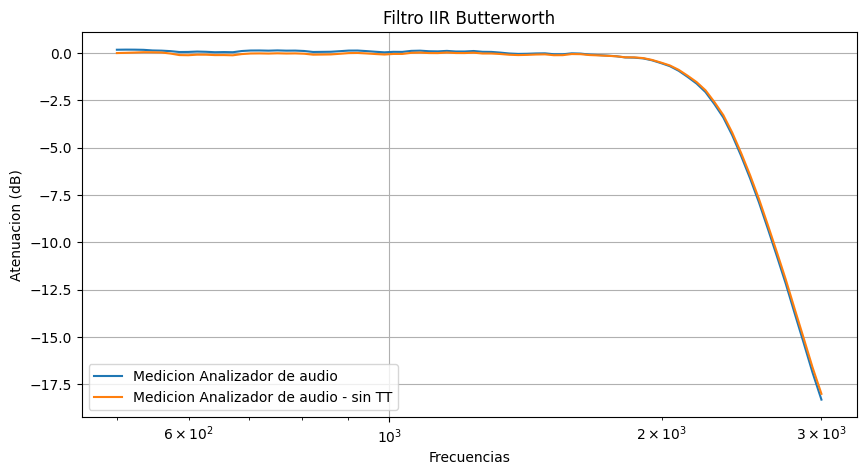

In [17]:
plt.figure(figsize=(10, 5))  

plt.semilogx(frequencies_vo_vi, vo,label = "Medicion Analizador de audio")

vo_pol = interp_AUDIO_TalkTrought(frequencies_vo_vi)
vo = vo - vo_pol
plt.semilogx(frequencies_vo_vi, vo,label = "Medicion Analizador de audio - sin TT")   

# Configuracion del grafico
plt.title('Filtro IIR Butterworth')
plt.xlabel('Frecuencias')
plt.ylabel('Atenuacion (dB)')
plt.grid(True)
plt.legend();

# Mostrar la gráfica
plt.show()